In [ ]:
import os
import subprocess
import sys
import shutil
from pathlib import Path
%load_ext autoreload
%autoreload 2

# install Stability SDK for Python
sdk_path = Path('./stability-sdk')
sdk_installed = os.path.exists(sdk_path)
package_installed = 'stability_sdk' in sys.modules
if sdk_path.exists() or package_installed:
    sys.path.append("./stability-sdk") # use local SDK src
else:
    %pip install ftfy grpcio grpcio-tools Pillow librosa pydub stability-sdk[anim_ui]
    if sdk_path.exists():
        shutil.rmtree(sdk_path)
        sub_p_res = subprocess.run(['pip', 'uninstall', '-y', 'stability-sdk'], stdout=subprocess.PIPE).stdout.decode('utf-8')
        print(sub_p_res)
    sub_p_res = subprocess.run(['git', 'clone', '-b', 'anima_stable', '--recurse-submodules', 'https://github.com/Stability-AI/stability-sdk'], stdout=subprocess.PIPE).stdout.decode('utf-8')
    print(sub_p_res)
    Path("./stability-sdk/src/stability_sdk/interfaces/__init__.py").touch()
    sub_p_res = subprocess.run(['pip', 'install', './stability-sdk[anim_ui]'], stdout=subprocess.PIPE).stdout.decode('utf-8')
    print(sub_p_res)


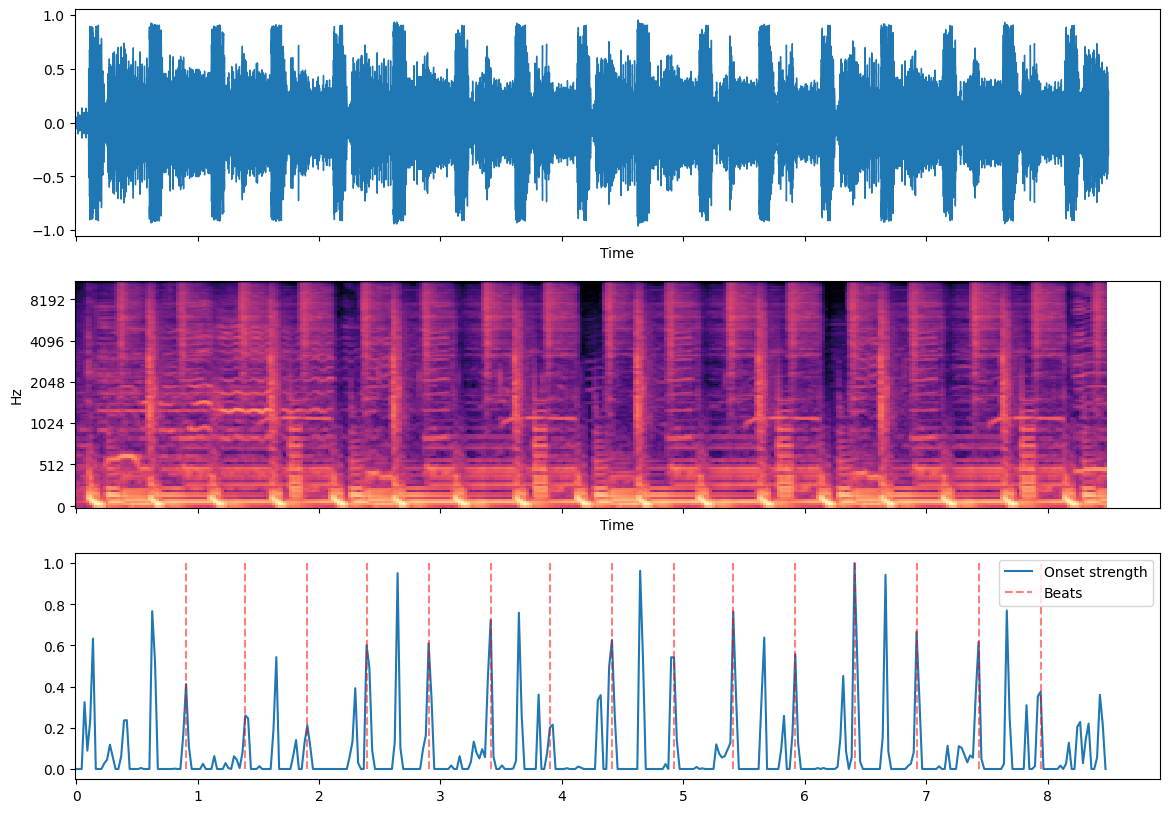

In [48]:
import os
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import librosa
import matplotlib.pyplot as plt
import librosa.display
import librosa.display

# audio_dir = 'F:\Google Drive\My Drive\AudioVisSnippets'
audio_dir = './AudioVisSnippets/'
os.makedirs(audio_dir, exist_ok=True)

audio_file_path = f"{audio_dir}/you_and_i.wav"

y, sr = librosa.load(audio_file_path)


outputs_path = "."
timestring = datetime.now().strftime('%Y%m%d%H%M%S')
out_dir = os.path.join(outputs_path, timestring)
os.makedirs(out_dir, exist_ok=True)

tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
hop_length = 512
fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(14, 10))
onset_env = librosa.onset.onset_strength(y=y, sr=sr,
                                         aggregate=np.median)
times = librosa.times_like(onset_env, sr=sr, hop_length=hop_length)
M = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=hop_length)
librosa.display.specshow(librosa.power_to_db(M, ref=np.max),
                         y_axis='mel', x_axis='time', hop_length=hop_length,
                         ax=ax[1])

librosa.display.waveshow(y, sr=sr, ax=ax[0])

ax[2].plot(times, librosa.util.normalize(onset_env),
         label='Onset strength')
ax[2].vlines(times[beats], 0, 1, alpha=0.5, color='r',
           linestyle='--', label='Beats')
ax[2].legend()


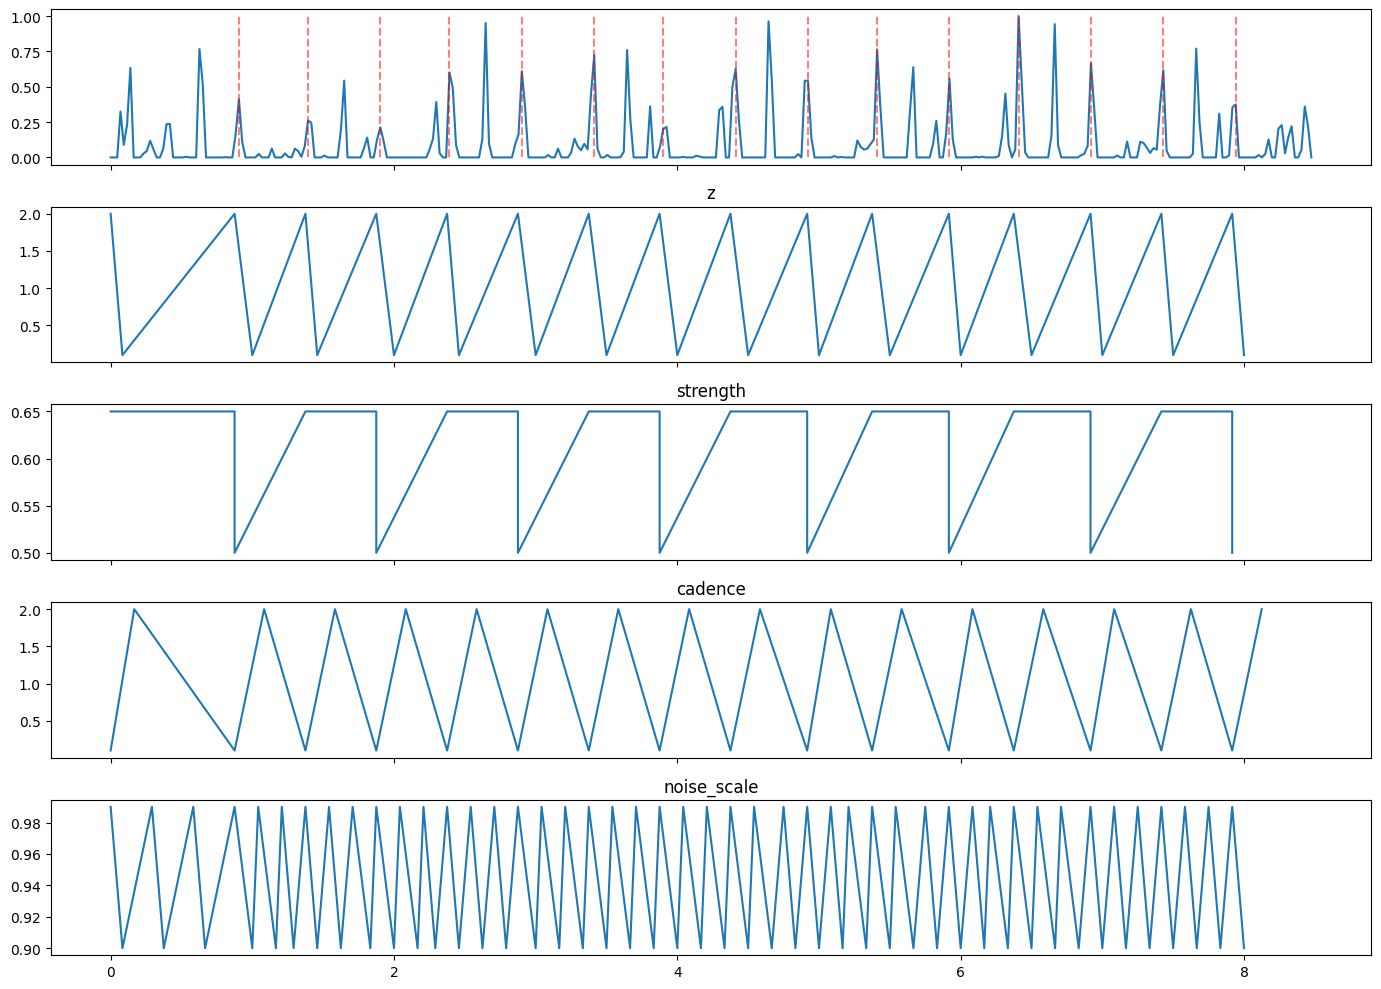

In [49]:
%autoreload 2
from typing import List
from tqdm.auto import tqdm
import os
from stability_sdk import client
from datetime import datetime
import numpy as np
from base64 import b64encode
from datetime import datetime
import matplotlib.pyplot as plt
from stability_sdk.api import Context
from IPython.display import display
import librosa
import librosa.display
from IPython.display import display, clear_output

# convert 2d np array of (ts, mag) to deforum frames
from beat_utils import BeatVisuals, as_beats

first = "an iridescent hibiscus by beeple and yusuke murata and makoto shinkai, 8 k, 3 d high resolution render, cinematic, unreal engine, featured on artstation, epic scale, volumetric lighting, ultra wide angle, intricate details, crystal, rainbow colors"
first = "Fractal landscape of geometric shapes and patterns, complex, intricate, abstract, digital art"
bt = times[beats]
# print(bt)
# print(sample_array(bt, 0.1))

fps = 24

bv = BeatVisuals(beats, times, fps=fps)

z_curve = bv.beats_deforum(0.1, [2, 0.1], every_n=1)
strength_curve = bv.beats_deforum(0, [0.65, 0.5], every_n=1)

cadence_curve = bv.beats_deforum(0.2, [0.1, 2], every_n=1)
noise_scale_curve = bv.beats_deforum(0.1, [0.99, 0.9], every_n=0.5)

# print('z', z_curve)
# print('cadence', cadence_curve)
# print('strength', strength_curve)
# print('noise_scale', noise_scale_curve)

fig, ax = plt.subplots(nrows=5, sharex=True, figsize=(14, 10))
ax[0].plot(times, librosa.util.normalize(onset_env),
         label='Onset strength')
ax[0].vlines(times[beats], 0, 1, alpha=0.5, color='r',
           linestyle='--', label='Beats')

labels = ['z', 'strength', 'cadence', 'noise_scale']
for i, curve in enumerate([z_curve, strength_curve, cadence_curve, noise_scale_curve]):
    x, y = bv.as_xy(curve)
    ax[i+1].plot(x,y, label=labels[i])
    ax[i+1].set_title(labels[i])
fig.tight_layout()

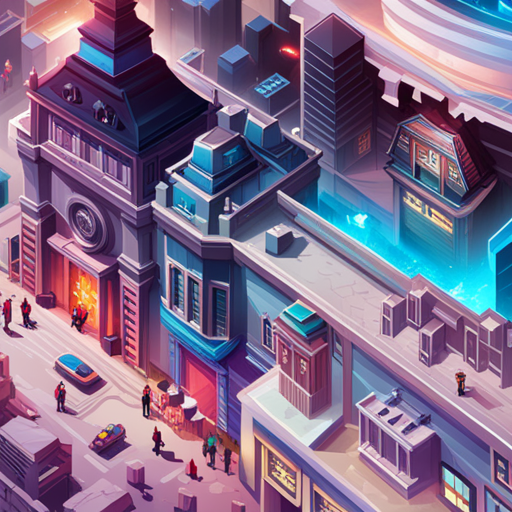

frame 158/203, took 8.049469 sec


In [50]:
from stability_sdk.animation import AnimationArgs, Animator
from dotenv import dotenv_values

config = dotenv_values(".env")

args = AnimationArgs()


# first = "an iridescent hibiscus by beeple and yusuke murata and makoto shinkai, intricate details, crystal, rainbow colors"
first = "Upscaled Hyperdetailed portrait of an epic and dramatic stunning hillside Color-ritual scene, Intricate line art, finely detailed art station winner by Kilian Eng and by Jake Parker, vibrant colors, winning-award masterpiece, fantastically gaudy, aesthetic octane render, 8K HD Resolution"

# first = "isometric view illustration of a Cyberpunk apartment, highly detailed,  by James Gilleard and Bruce Pennington"
# second = "a psychedelic hallucination of a brutalist hotel in the high plains desert, by kawase hasui, moebius, edward hopper, colorful flat surreal design, dramatic lighting, hd, 8 k, artstation "

# second = "A highly detailed digital art painting of a volcanic crystalline chasm at night, filled with glowing lava, shimmering starry nebula sky by Studio Ghibli, Makoto Shinkai, by Artgerm, by beeple, volumetric lighting, octane render, 4K resolution, trending on artstation, masterpiece, vivid colours"

# first = "Acrylic painting of a futuristic city, with neon lights, advanced technology, and flying cars, bold brushstrokes, high-contrast, highly stylized"
second = "isometric webdesign icon for daytime city for toledo ohio, 3d render, high details, cinematic, by artgerm, tooth wu, dan mumford, beeple, wlop, rossdraws, james jean, andrei riabovitchev, marc simonetti, yoshitaka amano, artstation"


args.preset = "digital-art"
# args.clip_guidance = False # not supported with XL
args.animation_mode = '3D warp'
args.seed = 2135
args.model = "stable-diffusion-xl-beta-v2-2-2"
args.locked_seed = False
args.interpolate_prompts = True
# args.noise_scale_curve = noise_scale_curve
args.strength_curve = as_beats(strength_curve)
args.translation_z = as_beats(z_curve)
args.diffusion_cadence_curve = as_beats(cadence_curve)
args.cadence_interp = 'film'
args.max_frames = bv.max_frames
args.fps = fps

print(args.translation_z)
print(args.diffusion_cadence_curve)
# args_vid_in.video_init_path = "/content/ocean.mp4"
# args_animation.animation_mode= 'Video Input'


# display.display(args)

# uploaded = files.upload()
def to_camelcase(s):
  return '_'.join(s.split(" "))

outputs_path = "."
timestring = datetime.now().strftime('%Y%m%d%H%M%S')
out_dir = os.path.join(outputs_path, timestring)
os.makedirs(out_dir, exist_ok=True)

height = 512
width = 512

GRPC_HOST = 'grpc.stability.ai:443'
API_KEY = config["API_KEY"]

api_context = Context(GRPC_HOST, API_KEY)

os.environ['STABILITY_HOST'] = GRPC_HOST
os.environ['STABILITY_KEY'] = API_KEY
channel = client.open_channel(GRPC_HOST, api_key=API_KEY)

beat_prompts = bv.beats_prompts([first, second])
display(beat_prompts)
animator = Animator(
    api_context=api_context,
    animation_prompts=beat_prompts,
    args=args,
    out_dir=out_dir,    
)

last_frame_time = datetime.now()
i = 1
for frame in tqdm(animator.render(), initial=animator.start_frame_idx, total=args.max_frames):
    frame_time = datetime.now()
    clear_output(wait=True)
    display(frame) 
    duration_sec = (frame_time-last_frame_time).total_seconds()
    print(f"frame {i}/{args.max_frames}, took {duration_sec} sec")
    i += 1
    last_frame_time = frame_time

In [45]:
from datetime import datetime
import os
import subprocess
import shutil
from IPython.display import display, HTML

# out_dir = "./20230527150743"

timestring = datetime.now().strftime('%Y%m%d%H%M%S')

video_name =  f"{timestring}.mp4"
image_path = os.path.join(out_dir, "frame_%05d.png")
mp4_path = os.path.join(out_dir, video_name)

print(f"Compiling animation frames to {mp4_path}...")


cmd = [
    'ffmpeg',
    '-y',
    '-vcodec', 'png',
    '-r', str(fps),
    '-start_number', str(0),
    '-i', image_path,
    '-i', audio_file_path,
    '-map', '0:v:0', '-map', '1:a:0',
    '-c:v', 'libx264',
    '-vf',
    f'fps={fps}',
    '-pix_fmt', 'yuv420p',
    '-crf', '17',
    '-preset', 'faster',
    mp4_path
]
print(cmd)
process = subprocess.Popen(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
stdout, stderr = process.communicate()
if process.returncode != 0:
    print(stderr)
    raise RuntimeError(stderr)

mp4 = open(mp4_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
display(HTML(f'<video controls loop><source src="{data_url}" type="video/mp4"></video>') )

Compiling animation frames to ./20230528201757/20230528202640.mp4...
['ffmpeg', '-y', '-vcodec', 'png', '-r', '24', '-start_number', '0', '-i', './20230528201757/frame_%05d.png', '-i', './AudioVisSnippets//you_and_i_short.wav', '-map', '0:v:0', '-map', '1:a:0', '-c:v', 'libx264', '-vf', 'fps=24', '-pix_fmt', 'yuv420p', '-crf', '17', '-preset', 'faster', './20230528201757/20230528202640.mp4']
